### Simulação do Cenário 2 - Opção 2 - Proposta

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


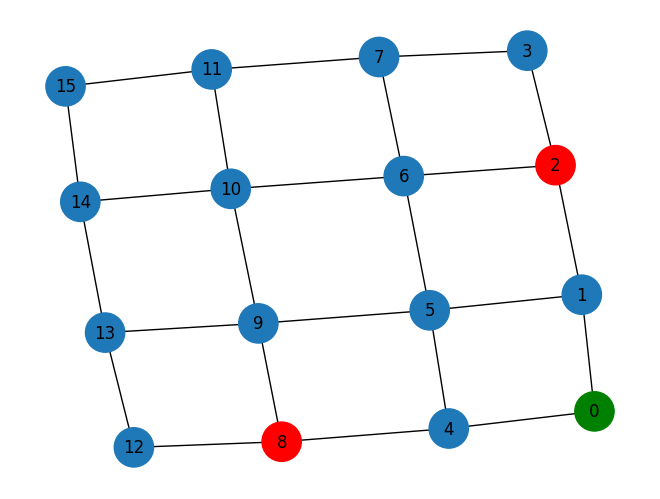

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


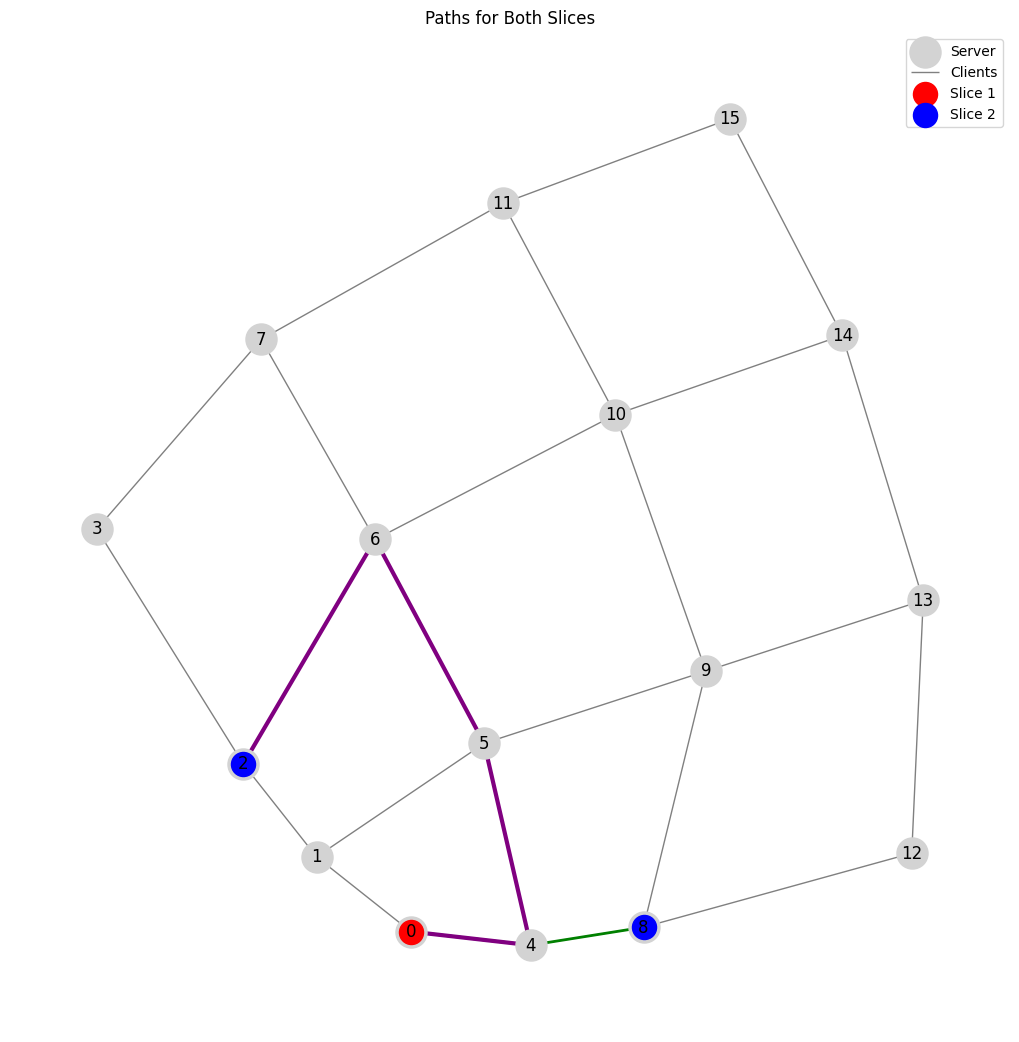

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



### Nessa parte, eu posso gerar minha requesições, com os protocolos: Childs(AC_BQC) e BFK_BQC.

##### O cenário 2 apresenta o agendamento das requesições de forma que pode-se executar uma requesição de cada protocolo, então a cada timeslot pode-se executar até duas requesições.  

In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(10):
    protocol = random.choice(["BFK_BQC", "AC_BQC"])  
    if protocol == "BFK_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "AC_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = random.randint(20, 30)
    num_gates = random.randint(15, 20)

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2024-12-23 12:11:20,808: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}
2024-12-23 12:11:20,809: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2024-12-23 12:11:20,991: Circuito aleatório gerado com 22 qubits e 18 portas. Instruções sobre o circuito.
2024-12-23 12:11:20,991: Instrução: {'operation': 's', 'qubits': [18]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'h', 'qubits': [17]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'swap', 'qubits': [21, 11]}
2024-12-23 12:11:20,991: Instrução: {'operation': 's', 'qubits': [8]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'y', 'qubits': [7]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'cx', 'qubits': [7, 21]}
2024-12-23 12:11:20,991: Instrução: {'operation': 'y', 'qubits': [7]}
2024-12-23 12:11:20,991: Instrução: {'operation': 's', 'qubits': [18]}
2024-12-23 12:11:20,998: Ins

                                         
 q_0: ───────────────────────────────────
                                         
 q_1: ───────────────────────────────────
                                         
 q_2: ───────────────────────────────────
           ┌───┐                         
 q_3: ─────┤ Y ├─────────────────────────
           └───┘                         
 q_4: ───────────────────────────────────
                                         
 q_5: ───────────────────────────────────
                                         
 q_6: ───────────────────────────────────
           ┌───┐          ┌───┐          
 q_7: ─────┤ Y ├───────■──┤ Y ├──────────
           ├───┤       │  └───┘     ┌───┐
 q_8: ─────┤ S ├───────┼────────────┤ X ├
           └───┘       │            └─┬─┘
 q_9: ─────────────────┼──────────────┼──
                       │              │  
q_10: ─────────────────┼──────────────┼──
                       │              │  
q_11: ───────X─────────┼─────────■

2024-12-23 12:11:21,081: Circuito aleatório gerado com 25 qubits e 18 portas. Instruções sobre o circuito.
2024-12-23 12:11:21,081: Instrução: {'operation': 'z', 'qubits': [6]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'cx', 'qubits': [18, 17]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'cz', 'qubits': [3, 17]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'cx', 'qubits': [15, 18]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'z', 'qubits': [16]}
2024-12-23 12:11:21,081: Instrução: {'operation': 's', 'qubits': [10]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'swap', 'qubits': [8, 16]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'cx', 'qubits': [16, 23]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'swap', 'qubits': [16, 6]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'z', 'qubits': [16]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'h', 'qubits': [6]}
2024-12-23 12:11:21,081: Instrução: {'operation': 'h', 'qubits': [12]}
2024-12-23 1

                ┌───┐                     
 q_0: ───────■──┤ S ├─────────────────────
             │  └───┘                     
 q_1: ───────┼────────────────────────────
             │  ┌───┐                     
 q_2: ───────┼──┤ X ├─────────────────────
             │  └─┬─┘                     
 q_3: ───────┼────┼───────────────────────
      ┌───┐  │    │                       
 q_4: ┤ S ├──┼────┼────────X──X───────────
      ├───┤  │    │        │  │           
 q_5: ┤ S ├──┼────┼────────┼──┼───────────
      └───┘┌─┴─┐  │        │  │           
 q_6: ─────┤ X ├──┼────────┼──┼───────────
           └───┘  │        │  │           
 q_7: ────────────┼────────┼──┼───────────
      ┌───┐       │        │  │           
 q_8: ┤ H ├───────┼────────┼──┼───────────
      └───┘┌───┐  │        │  │           
 q_9: ─────┤ Y ├──┼────────┼──┼───────────
           ├───┤  │  ┌───┐ │  │           
q_10: ─────┤ H ├──┼──┤ X ├─┼──┼───■───────
           └───┘  │  └───┘ │  │   │       
q_11: ─────

2024-12-23 12:11:21,341: Circuito aleatório gerado com 25 qubits e 18 portas. Instruções sobre o circuito.
2024-12-23 12:11:21,341: Instrução: {'operation': 'cz', 'qubits': [23, 24]}
2024-12-23 12:11:21,351: Instrução: {'operation': 'y', 'qubits': [15]}
2024-12-23 12:11:21,351: Instrução: {'operation': 't', 'qubits': [14]}
2024-12-23 12:11:21,351: Instrução: {'operation': 's', 'qubits': [2]}
2024-12-23 12:11:21,351: Instrução: {'operation': 'cz', 'qubits': [12, 17]}
2024-12-23 12:11:21,351: Instrução: {'operation': 'swap', 'qubits': [20, 3]}
2024-12-23 12:11:21,351: Instrução: {'operation': 'z', 'qubits': [8]}
2024-12-23 12:11:21,351: Instrução: {'operation': 's', 'qubits': [5]}
2024-12-23 12:11:21,351: Instrução: {'operation': 'cz', 'qubits': [4, 5]}
2024-12-23 12:11:21,356: Instrução: {'operation': 'z', 'qubits': [19]}
2024-12-23 12:11:21,356: Instrução: {'operation': 'swap', 'qubits': [14, 8]}
2024-12-23 12:11:21,357: Instrução: {'operation': 'swap', 'qubits': [21, 18]}
2024-12-23 1

                                 
 q_0: ───────────────────────────
                                 
 q_1: ───────────────────────────
      ┌───┐              ┌───┐   
 q_2: ┤ S ├────────────X─┤ X ├───
      └───┘      ┌───┐ │ └───┘   
 q_3: ─────────X─┤ H ├─┼─────────
               │ └───┘ │         
 q_4: ──────■──┼───────┼─────────
      ┌───┐ │  │ ┌───┐ │         
 q_5: ┤ S ├─■──┼─┤ S ├─┼─────────
      └───┘    │ └───┘ │         
 q_6: ─────────┼───────┼───■─────
               │       │   │     
 q_7: ─────────┼───────┼───┼───X─
      ┌───┐    │       │   │   │ 
 q_8: ┤ Z ├────┼───X───┼───┼───┼─
      └───┘    │   │   │   │   │ 
 q_9: ─────────┼───┼───┼───┼───┼─
               │   │   │   │   │ 
q_10: ─────────┼───┼───┼───┼───┼─
               │   │   │   │   │ 
q_11: ─────────┼───┼───┼───┼───┼─
               │   │   │   │   │ 
q_12: ──────■──┼───┼───┼───┼───┼─
            │  │   │   │   │   │ 
q_13: ──────┼──┼───┼───┼───┼───┼─
      ┌───┐ │  │   │   │   │   │ 
q_14: ┤ T ├─┼─

2024-12-23 12:11:21,471: Instrução: {'operation': 't', 'qubits': [10]}
2024-12-23 12:11:21,471: Instrução: {'operation': 'swap', 'qubits': [1, 26]}
2024-12-23 12:11:21,471: Instrução: {'operation': 't', 'qubits': [8]}
2024-12-23 12:11:21,472: Instrução: {'operation': 'cx', 'qubits': [7, 23]}
2024-12-23 12:11:21,472: Instrução: {'operation': 't', 'qubits': [26]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'swap', 'qubits': [18, 13]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'y', 'qubits': [18]}
2024-12-23 12:11:21,474: Instrução: {'operation': 't', 'qubits': [15]}
2024-12-23 12:11:21,474: Instrução: {'operation': 't', 'qubits': [5]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'cx', 'qubits': [16, 25]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'h', 'qubits': [12]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'h', 'qubits': [14]}
2024-12-23 12:11:21,474: Instrução: {'operation': 'z', 'qubits': [0]}
2024-12-23 12:11:21,474: Instrução: {'operation': 't', 'qu

                                          
 q_0: ────────────────────────────────────
                ┌───┐                ┌───┐
 q_1: ──────────┤ X ├────────────────┤ X ├
                └─┬─┘                └─┬─┘
 q_2: ────────────┼────────────────────┼──
                  │                    │  
 q_3: ────────────┼────────────────■───┼──
           ┌───┐  │                │   │  
 q_4: ──■──┤ S ├──┼────────────────┼───┼──
        │  └───┘  │                │   │  
 q_5: ──┼─────────┼────────────────┼───┼──
        │         │                │   │  
 q_6: ──┼─────────┼────────────────┼───┼──
        │         │                │   │  
 q_7: ──┼────■────┼────────────────┼───┼──
        │    │    │                │   │  
 q_8: ──┼────┼────■────────────────┼───┼──
        │    │               ┌───┐ │   │  
 q_9: ──┼────┼────■──────────┤ X ├─┼───┼──
        │  ┌─┴─┐  │  ┌───┐   └─┬─┘ │   │  
q_10: ──┼──┤ X ├──┼──┤ T ├─■───┼───┼───┼──
        │  ├───┤  │  └───┘ │   │   │   │  
q_11: ──┼──

2024-12-23 12:11:21,657: Instrução: {'operation': 'cx', 'qubits': [12, 21]}
2024-12-23 12:11:21,657: Instrução: {'operation': 'h', 'qubits': [7]}
2024-12-23 12:11:21,657: Instrução: {'operation': 'cx', 'qubits': [12, 19]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'h', 'qubits': [19]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'y', 'qubits': [21]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'swap', 'qubits': [13, 6]}
2024-12-23 12:11:21,661: Instrução: {'operation': 's', 'qubits': [20]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'swap', 'qubits': [9, 3]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'h', 'qubits': [4]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'cz', 'qubits': [8, 11]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'swap', 'qubits': [12, 0]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'cx', 'qubits': [16, 17]}
2024-12-23 12:11:21,661: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-23 12:11:21,661: Instrução: {'operat

                ┌───┐              
 q_0: ──────────┤ S ├──────────────
                └───┘              
 q_1: ─────────────────────────────
                                   
 q_2: ──■──────────────────────────
        │       ┌───┐              
 q_3: ──┼───────┤ H ├──────────────
        │       └───┘              
 q_4: ──┼──────────────────────────
        │                          
 q_5: ──┼─────────X────────────────
        │         │  ┌───┐         
 q_6: ──┼────■────X──┤ Z ├─────────
        │    │       └───┘         
 q_7: ──┼────┼─────────────────────
        │    │                     
 q_8: ──┼────┼─────────X───────────
        │    │  ┌───┐  │           
 q_9: ──┼────┼──┤ H ├──┼───────────
        │    │  └───┘  │           
q_10: ──┼────┼─────────X───■───────
        │    │  ┌───┐┌───┐ │       
q_11: ──┼────┼──┤ T ├┤ S ├─┼───────
        │    │  └───┘├───┤ │       
q_12: ──┼────┼───────┤ X ├─┼─────■─
        │    │       └─┬─┘ │     │ 
q_13: ──┼────┼─────────┼───┼

2024-12-23 12:11:21,891: Circuito aleatório gerado com 24 qubits e 15 portas. Instruções sobre o circuito.
2024-12-23 12:11:21,891: Instrução: {'operation': 't', 'qubits': [12]}
2024-12-23 12:11:21,891: Instrução: {'operation': 'cx', 'qubits': [13, 14]}
2024-12-23 12:11:21,891: Instrução: {'operation': 's', 'qubits': [22]}
2024-12-23 12:11:21,891: Instrução: {'operation': 's', 'qubits': [5]}
2024-12-23 12:11:21,898: Instrução: {'operation': 'cx', 'qubits': [21, 10]}
2024-12-23 12:11:21,898: Instrução: {'operation': 't', 'qubits': [20]}
2024-12-23 12:11:21,898: Instrução: {'operation': 'h', 'qubits': [19]}
2024-12-23 12:11:21,898: Instrução: {'operation': 's', 'qubits': [23]}
2024-12-23 12:11:21,898: Instrução: {'operation': 'y', 'qubits': [7]}
2024-12-23 12:11:21,901: Instrução: {'operation': 'swap', 'qubits': [8, 20]}
2024-12-23 12:11:21,901: Instrução: {'operation': 't', 'qubits': [14]}
2024-12-23 12:11:21,901: Instrução: {'operation': 'cz', 'qubits': [19, 15]}
2024-12-23 12:11:21,90

Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:22,086: Timeslot 24 Fidelidade final do teletransporte: 0.9263
2024-12-23 12:11:22,086: Timeslot 24 EPR consumido no segmento 8 -> 4 com fidelidade 0.9795.
2024-12-23 12:11:22,086: Timeslot 24 EPR consumido no segmento 4 -> 0 com fidelidade 0.9795.
2024-12-23 12:11:22,091: Timeslot 25 Fidelidade final do teletransporte: 0.9228
2024-12-23 12:11:22,091: Timeslot 25 Foram utilizados 44 pares EPRs ao longo da transmissão.
2024-12-23 12:11:22,091: Pares EPRs restantes na rota:
2024-12-23 12:11:22,091: Timeslot 25 Segmento 8 -> 4: 0 pares EPRs restantes.
2024-12-23 12:11:22,091: Timeslot 25 Segmento 4 -> 0: 0 pares EPRs restantes.
2024-12-23 12:11:22,096: Timeslot 25 Transmissão de 22 qubits entre 8 e 0 concluída com sucesso.
2024-12-23 12:11:22,096: Timeslot 26.
2024-12-23 12:11:22,096: Servidor 0 criou um estado de brickwork com 22 qubits.
2024-12-23 12:11:22,096: Rodada 1: Cliente 8 envia ângulo de medição 1.6308502151471764 ao servidor.
2024-12-23 12:11:22,099: Timeslot 

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:23,241: Timeslot 160.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:23,241: Cliente 8 ajustou a próxima base de medição para 1.6638412922678267.
2024-12-23 12:11:23,241: Rodada 5: Cliente 8 envia ângulo de medição 0.807147508212078 ao servidor.
2024-12-23 12:11:23,241: Timeslot 161.Servidor realiza a medição do qubit.
2024-12-23 12:11:23,241: Servidor 0 realizou a medição do qubit na base 0.807147508212078, com resultado 0.
2024-12-23 12:11:23,241: Timeslot 162.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:23,241: Cliente 8 ajustou a próxima base de medição para 0.7071475082120781.
2024-12-23 12:11:23,241: Rodada 6: Cliente 8 envia ângulo de medição 6.0452376065252444 ao servidor.
2024-12-23 12:11:23,241: Timeslot 163.Servidor realiza a medição do qubit.
2024-12-23 12:11:23,241: Servidor 0 realizou a medição do qubit na base 6.0452376065252444, com resultado 0.
2024-12-23 12:11:23,241: Timeslot 164.Cliente ajusta a próxima base de medição.
2024

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:24,236: Servidor 0 criou um estado de brickwork com 29 qubits.
2024-12-23 12:11:24,236: Rodada 1: Cliente 8 envia ângulo de medição 3.7342390137258414 ao servidor.
2024-12-23 12:11:24,236: Timeslot 285.Servidor realiza a medição do qubit.
2024-12-23 12:11:24,236: Servidor 0 realizou a medição do qubit na base 3.7342390137258414, com resultado 1.
2024-12-23 12:11:24,236: Timeslot 286.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:24,236: Cliente 8 ajustou a próxima base de medição para 3.8342390137258415.
2024-12-23 12:11:24,241: Rodada 2: Cliente 8 envia ângulo de medição 2.0605244455857767 ao servidor.
2024-12-23 12:11:24,241: Timeslot 287.Servidor realiza a medição do qubit.
2024-12-23 12:11:24,241: Servidor 0 realizou a medição do qubit na base 2.0605244455857767, com resultado 1.
2024-12-23 12:11:24,241: Timeslot 288.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:24,241: Cliente 8 ajustou a próxima base de medição para 2.160524445585777.
202

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:25,249: Timeslot 410 Transmissão de 22 qubits entre 8 e 0 concluída com sucesso.
2024-12-23 12:11:25,250: Timeslot 411.
2024-12-23 12:11:25,250: Servidor 0 criou um estado de brickwork com 22 qubits.
2024-12-23 12:11:25,251: Rodada 1: Cliente 8 envia ângulo de medição 2.7794003947738823 ao servidor.
2024-12-23 12:11:25,252: Timeslot 412.Servidor realiza a medição do qubit.
2024-12-23 12:11:25,252: Servidor 0 realizou a medição do qubit na base 2.7794003947738823, com resultado 1.
2024-12-23 12:11:25,253: Timeslot 413.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:25,255: Cliente 8 ajustou a próxima base de medição para 2.8794003947738824.
2024-12-23 12:11:25,256: Rodada 2: Cliente 8 envia ângulo de medição 0.39070926218546875 ao servidor.
2024-12-23 12:11:25,257: Timeslot 414.Servidor realiza a medição do qubit.
2024-12-23 12:11:25,257: Servidor 0 realizou a medição do qubit na base 0.39070926218546875, com resultado 0.
2024-12-23 12:11:25,258: Timeslot 415

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:26,751: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9EB6210> adicionado ao canal (8, 4).
2024-12-23 12:11:26,751: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9E3C310> adicionado ao canal (8, 4).
2024-12-23 12:11:26,751: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9E3E890> adicionado ao canal (8, 4).
2024-12-23 12:11:26,756: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9EE7E90> adicionado ao canal (8, 4).
2024-12-23 12:11:26,756: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9E83C90> adicionado ao canal (8, 4).
2024-12-23 12:11:26,756: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168DA0EF1D0> adicionado ao canal (8, 4).
2024-12-23 12:11:26,756: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9F73C10> adicionado ao canal (8, 4).
2024-12-23 12:11:26,756: Timeslot 519 Pares EPRs criados para o enlace 8 -> 4.
2024-12-23 12:11:26,756: Par EPR <quantumnet.objects.epr.Epr object at 0x00000168D9FD1B1

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:27,391: Timeslot 611 Fidelidade final do teletransporte: 0.9464
2024-12-23 12:11:27,391: Timeslot 611 EPR consumido no segmento 8 -> 4 com fidelidade 0.9980.
2024-12-23 12:11:27,396: Timeslot 611 EPR consumido no segmento 4 -> 0 com fidelidade 0.9980.
2024-12-23 12:11:27,396: Timeslot 612 Fidelidade final do teletransporte: 0.9372
2024-12-23 12:11:27,396: Timeslot 612 EPR consumido no segmento 8 -> 4 com fidelidade 0.9970.
2024-12-23 12:11:27,396: Timeslot 612 EPR consumido no segmento 4 -> 0 com fidelidade 0.9970.
2024-12-23 12:11:27,401: Timeslot 613 Fidelidade final do teletransporte: 0.9941
2024-12-23 12:11:27,401: Timeslot 613 EPR consumido no segmento 8 -> 4 com fidelidade 0.9961.
2024-12-23 12:11:27,401: Timeslot 613 EPR consumido no segmento 4 -> 0 com fidelidade 0.9961.
2024-12-23 12:11:27,407: Timeslot 614 Fidelidade final do teletransporte: 0.9910
2024-12-23 12:11:27,407: Timeslot 614 EPR consumido no segmento 8 -> 4 com fidelidade 0.9951.
2024-12-23 12:11:2

##### Mostra o relatório de execução das requesições.

In [4]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)


=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 22, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 25, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 25, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 23, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 29, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 20, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 22, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 29, Slice Path: [2, 6, 5, 4, 0], Status: execu

##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [5]:
slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

controlador.initialize_slices(
    network=rede,
    clients=[8],  
    server=0,      
    protocols=["BFK_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
    slice_1_paths=slice_1_paths,
    slice_2_paths=slice_2_paths
)
for _ in range(10):
    alice_id = 8 
    bob_id = 0     
    num_qubits = 10  
    num_gates = 20 
    slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

    # Gerar uma única requisição de teste para o protocolo BFK
    rede.generate_request_slice(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,  
        protocol="BFK_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
        slice_path=slice_path,
        scenario= 2 
    )


scheduled_timeslots = rede.send_requests_to_controller(controlador)

rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)

2024-12-23 12:11:27,717: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}


2024-12-23 12:11:27,836: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2024-12-23 12:11:27,841: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2024-12-23 12:11:27,841: Instrução: {'operation': 'cx', 'qubits': [6, 9]}
2024-12-23 12:11:27,841: Instrução: {'operation': 'z', 'qubits': [6]}
2024-12-23 12:11:27,841: Instrução: {'operation': 'h', 'qubits': [1]}
2024-12-23 12:11:27,841: Instrução: {'operation': 't', 'qubits': [7]}
2024-12-23 12:11:27,846: Instrução: {'operation': 'swap', 'qubits': [8, 4]}
2024-12-23 12:11:27,846: Instrução: {'operation': 'h', 'qubits': [5]}
2024-12-23 12:11:27,846: Instrução: {'operation': 'cx', 'qubits': [9, 7]}
2024-12-23 12:11:27,846: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-23 12:11:27,846: Instrução: {'operation': 'swap', 'qubits': [5, 2]}
2024-12-23 12:11:27,846: Instrução: {'operation': 't', 'qubits': [1]}
2024-12-23 12:11:27,851: Instrução: {'operation': 's', 'qubits': [3]}
2024-12-23 12:11:27,851: Inst

          ┌───┐┌───┐                     
q_0: ──■──┤ T ├┤ X ├─────────────────────
     ┌─┴─┐├───┤├───┤          ┌───┐      
q_1: ┤ X ├┤ H ├┤ T ├──────────┤ X ├────X─
     └───┘└───┘└───┘          └─┬─┘    │ 
q_2: ───────X───────────────────┼──────┼─
            │  ┌───┐┌───┐┌───┐  │      │ 
q_3: ───────┼──┤ S ├┤ Z ├┤ X ├──┼───X──┼─
            │  └───┘└───┘└───┘  │   │  │ 
q_4: ───────┼────X──────────────┼───┼──X─
     ┌───┐  │    │              │   │    
q_5: ┤ H ├──X────┼──────────────┼───┼────
     └───┘┌───┐  │              │   │    
q_6: ──■──┤ Z ├──┼──────────────■───┼────
       │  ├───┤  │  ┌───┐           │    
q_7: ──┼──┤ T ├──┼──┤ X ├───────────┼────
       │  └───┘  │  └─┬─┘     ┌───┐ │    
q_8: ──┼─────────X────┼────■──┤ Y ├─┼────
     ┌─┴─┐            │  ┌─┴─┐└───┘ │    
q_9: ┤ X ├────────────■──┤ X ├──────X────
     └───┘               └───┘           
                                                      
q_0: ──X───────────────────────X──────────────────────
       │

2024-12-23 12:11:28,002: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2024-12-23 12:11:28,002: Instrução: {'operation': 'y', 'qubits': [7]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'cz', 'qubits': [4, 3]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'cx', 'qubits': [2, 8]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'x', 'qubits': [4]}
2024-12-23 12:11:28,002: Instrução: {'operation': 'cx', 'qubits': [8, 9]}
2024-12-23 12:11:28,011: Instrução: {'operation': 'cx', 'qubits': [2, 7]}
2024-12-23 12:11:28,011: Instrução: {'operation': 's', 'qubits': [4]}
2024-12-23 12:11:28,011: Instrução: {'operation': 'y', 'qubits': [9]}
2024-12-23 12:11:28,011: Instrução: {'operation': 'z', 'qubits': [6]}
2024-12-23 12:11:28,011: Instrução: {'operation': 'cx', 'qubits': [9, 1]}
2024-12-23 12:11:28,011

                              ┌───┐             ┌───┐     
q_0: ──■──────────────────────┤ X ├───────────X─┤ T ├─────
       │                      └─┬─┘     ┌───┐ │ └───┘┌───┐
q_1: ──┼─────────■──────────────┼────■──┤ X ├─┼──────┤ X ├
       │         │              │    │  └───┘ │      └─┬─┘
q_2: ──■────■────┼──────────────┼────┼────────┼───■────┼──
            │    │              │    │        │   │    │  
q_3: ──■────■────┼──────────────┼────┼────────┼───┼────┼──
       │         │              │    │        │   │    │  
q_4: ──■─────────┼──────────────┼────┼────■───┼───■────┼──
     ┌───┐┌───┐  │  ┌───┐┌───┐  │    │    │   │ ┌───┐  │  
q_5: ┤ S ├┤ X ├──┼──┤ H ├┤ H ├──┼────┼────■───┼─┤ Y ├──┼──
     ├───┤└─┬─┘┌─┴─┐└───┘└───┘  │    │  ┌───┐ │ └───┘  │  
q_6: ┤ T ├──■──┤ X ├────────────■────┼──┤ T ├─X────────┼──
     ├───┤     └───┘                 │  └───┘          │  
q_7: ┤ S ├───────────────────────────┼─────────────────■──
     └───┘                           │                  

2024-12-23 12:11:28,266: Instrução: {'operation': 'z', 'qubits': [5]}
2024-12-23 12:11:28,266: Instrução: {'operation': 'swap', 'qubits': [3, 4]}
2024-12-23 12:11:28,266: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'swap', 'qubits': [1, 7]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'h', 'qubits': [9]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'cz', 'qubits': [3, 6]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'cx', 'qubits': [9, 4]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'h', 'qubits': [5]}
2024-12-23 12:11:28,271: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'swap', 'qubits': [0, 6]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'y', 'qubits': [6]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'x', 'qubits': [6]}
2024-12-23 12:11:28,271: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2024-12-23 12:11:28,277: Instrução: {'operation': 'y', 'qubi

                                              ┌───┐     
q_0: ──■────────────────────────────────────■─┤ S ├──X──
       │  ┌───┐                             │ └───┘  │  
q_1: ──┼──┤ S ├─────────────────────────────┼────────┼──
       │  └───┘                             │        │  
q_2: ──┼────■──────────────■────────────────┼────────X──
       │    │  ┌───┐       │                │           
q_3: ──┼────┼──┤ S ├───────┼────────────X───┼───────────
       │    │  └───┘       │            │   │      ┌───┐
q_4: ──┼────┼────X─────────┼────────■───┼───■───■──┤ Y ├
       │    │    │  ┌───┐  │        │   │       │  └───┘
q_5: ──┼────■────┼──┤ H ├──┼────────┼───┼───────┼───────
       │         │  └───┘  │        │   │       │       
q_6: ──┼─────────┼─────────┼────■───┼───┼───────┼───────
       │         │         │    │   │   │       │       
q_7: ──┼─────────┼─────────┼────┼───┼───┼───────┼───────
       │  ┌───┐  │  ┌───┐┌─┴─┐┌─┴─┐ │   │       │       
q_8: ──┼──┤ Z ├──┼──┤ Z ├┤ X ├┤

2024-12-23 12:11:28,556: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2024-12-23 12:11:28,556: Instrução: {'operation': 'cx', 'qubits': [6, 2]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'y', 'qubits': [4]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cx', 'qubits': [8, 4]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cx', 'qubits': [9, 2]}
2024-12-23 12:11:28,561: Instrução: {'operation': 's', 'qubits': [6]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'swap', 'qubits': [0, 6]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cz', 'qubits': [5, 1]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cz', 'qubits': [7, 2]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cx', 'qubits': [1, 5]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'h', 'qubits': [0]}
2024-12-23 12:11:28,561: Instrução: {'operation': 'cx', 'qubits': [9, 7]}
2024-12-23 12:11:28

          ┌───┐┌───┐               
q_0: ──■──┤ X ├┤ S ├───────────────
       │  └─┬─┘├───┤┌───┐┌───┐     
q_1: ──┼────■──┤ X ├┤ T ├┤ X ├─────
     ┌─┴─┐     └───┘└───┘└───┘     
q_2: ┤ X ├───────X─────────────────
     └───┘       │                 
q_3: ──■─────────┼────■─────────■──
       │         │    │         │  
q_4: ──■─────────┼────┼─────────┼──
                 │    │         │  
q_5: ───────X────X────■────X────■──
     ┌───┐  │  ┌───┐       │  ┌───┐
q_6: ┤ T ├──┼──┤ S ├───────X──┤ X ├
     ├───┤  │  ├───┤┌───┐     └─┬─┘
q_7: ┤ S ├──┼──┤ Z ├┤ H ├───────┼──
     └───┘  │  ├───┤└───┘       │  
q_8: ───────X──┤ Y ├────────────┼──
     ┌───┐     └───┘            │  
q_9: ┤ T ├──────────────────────■──
     └───┘                         
          ┌───┐                  ┌───┐┌───┐
q_0: ──■──┤ T ├───────────────X──┤ Z ├┤ X ├
       │  └───┘               │  └───┘└───┘
q_1: ──┼────────X────────X────X────────────
       │        │ ┌───┐  │                 
q_2: ──┼────■───┼─┤ H ├─

2024-12-23 12:11:28,843: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2024-12-23 12:11:28,843: Instrução: {'operation': 'swap', 'qubits': [4, 5]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'cz', 'qubits': [3, 0]}
2024-12-23 12:11:28,843: Instrução: {'operation': 't', 'qubits': [8]}
2024-12-23 12:11:28,843: Instrução: {'operation': 's', 'qubits': [6]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'cz', 'qubits': [5, 7]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'cx', 'qubits': [2, 9]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'swap', 'qubits': [3, 1]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'cz', 'qubits': [3, 7]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'h', 'qubits': [3]}
2024-12-23 12:11:28,843: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-23 12:11:28,843: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-23 12:11:28,851: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-23 12:11:28,851: 

          ┌───┐                            
q_0: ──■──┤ Y ├──────────────────────────X─
       │  ├───┤                          │ 
q_1: ──┼──┤ Y ├──X──────────────X────────┼─
       │  └───┘  │  ┌───┐┌───┐  │        │ 
q_2: ──┼─────────┼──┤ X ├┤ Y ├──┼────────┼─
       │         │  └─┬─┘├───┤  │  ┌───┐ │ 
q_3: ──┼─────────X────┼──┤ H ├──┼──┤ X ├─┼─
       │              │  └───┘  │  └───┘ │ 
q_4: ──┼────■─────────┼─────────┼────────┼─
       │    │  ┌───┐  │         │  ┌───┐ │ 
q_5: ──■────┼──┤ S ├──┼─────────X──┤ Z ├─┼─
     ┌───┐  │  └───┘  │       ┌───┐└───┘ │ 
q_6: ┤ S ├──■─────────■────■──┤ S ├──────X─
     └───┘                 │  └───┘        
q_7: ───────X──────────────┼───────────────
            │  ┌───┐       │               
q_8: ──X────X──┤ Y ├───────┼───────────────
       │       └───┘     ┌─┴─┐┌───┐        
q_9: ──X─────────────────┤ X ├┤ S ├────────
                         └───┘└───┘        
Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionad

2024-12-23 12:11:29,046: Timeslot 690 EPR consumido no segmento 8 -> 4 com fidelidade 0.9941.
2024-12-23 12:11:29,046: Timeslot 690 EPR consumido no segmento 4 -> 0 com fidelidade 0.9941.
2024-12-23 12:11:29,051: Timeslot 691 Fidelidade final do teletransporte: 0.8975
2024-12-23 12:11:29,051: Timeslot 691 EPR consumido no segmento 8 -> 4 com fidelidade 0.9931.
2024-12-23 12:11:29,051: Timeslot 691 EPR consumido no segmento 4 -> 0 com fidelidade 0.9931.
2024-12-23 12:11:29,051: Timeslot 692 Fidelidade final do teletransporte: 0.9381
2024-12-23 12:11:29,051: Timeslot 692 EPR consumido no segmento 8 -> 4 com fidelidade 0.9921.
2024-12-23 12:11:29,051: Timeslot 692 EPR consumido no segmento 4 -> 0 com fidelidade 0.9921.
2024-12-23 12:11:29,051: Timeslot 693 Fidelidade final do teletransporte: 0.9897
2024-12-23 12:11:29,051: Timeslot 693 EPR consumido no segmento 8 -> 4 com fidelidade 0.9911.
2024-12-23 12:11:29,056: Timeslot 693 EPR consumido no segmento 4 -> 0 com fidelidade 0.9911.
2024-

Pares EPRs adicionados
Hosts inicializados
Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:29,278: Rede reiniciada. Timeslot atual: 3.
2024-12-23 12:11:29,279: Executando requisições do timeslot 3.
2024-12-23 12:11:29,280: Executando requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC
2024-12-23 12:11:29,281: Timeslot 749. Iniciando protocolo BFK com 10 qubits, 10 rodadas, e cenário 2.
2024-12-23 12:11:29,281: Memória do cliente 8 (Alice) limpa com sucesso.
2024-12-23 12:11:29,281: Memória do servidor 0 (Bob) limpa com sucesso.
2024-12-23 12:11:29,281: Timeslot 750.
2024-12-23 12:11:29,281: Qubit 76 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 141 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 248 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 151 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 223 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 312 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 792 preparado pelo cliente 8.
2024-12-23 12:11:29,281: Qubit 678 preparado pelo cliente 8.
2024-12-23 12:11:

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:29,641: Rodada 2: Cliente 8 envia ângulo de medição 0.5752520896033136 ao servidor.
2024-12-23 12:11:29,643: Timeslot 797.Servidor realiza a medição do qubit.
2024-12-23 12:11:29,644: Servidor 0 realizou a medição do qubit na base 0.5752520896033136, com resultado 0.
2024-12-23 12:11:29,647: Timeslot 798.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:29,647: Cliente 8 ajustou a próxima base de medição para 0.47525208960331367.
2024-12-23 12:11:29,649: Rodada 3: Cliente 8 envia ângulo de medição 2.3851086931595598 ao servidor.
2024-12-23 12:11:29,651: Timeslot 799.Servidor realiza a medição do qubit.
2024-12-23 12:11:29,651: Servidor 0 realizou a medição do qubit na base 2.3851086931595598, com resultado 1.
2024-12-23 12:11:29,651: Timeslot 800.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:29,651: Cliente 8 ajustou a próxima base de medição para 2.48510869315956.
2024-12-23 12:11:29,651: Rodada 4: Cliente 8 envia ângulo de medição 1.187766087623

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:29,941: Cliente 8 ajustou a próxima base de medição para 3.818098983685278.
2024-12-23 12:11:29,941: Rodada 5: Cliente 8 envia ângulo de medição 3.6525520727918344 ao servidor.
2024-12-23 12:11:29,946: Timeslot 836.Servidor realiza a medição do qubit.
2024-12-23 12:11:29,946: Servidor 0 realizou a medição do qubit na base 3.6525520727918344, com resultado 1.
2024-12-23 12:11:29,946: Timeslot 837.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:29,946: Cliente 8 ajustou a próxima base de medição para 3.7525520727918344.
2024-12-23 12:11:29,946: Rodada 6: Cliente 8 envia ângulo de medição 5.965317778175463 ao servidor.
2024-12-23 12:11:29,951: Timeslot 838.Servidor realiza a medição do qubit.
2024-12-23 12:11:29,951: Servidor 0 realizou a medição do qubit na base 5.965317778175463, com resultado 0.
2024-12-23 12:11:29,951: Timeslot 839.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:29,971: Cliente 8 ajustou a próxima base de medição para 5.865317778

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:30,221: Timeslot 875.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,227: Servidor 0 realizou a medição do qubit na base 5.427492965086666, com resultado 0.
2024-12-23 12:11:30,230: Timeslot 876.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,231: Cliente 8 ajustou a próxima base de medição para 5.327492965086666.
2024-12-23 12:11:30,231: Rodada 9: Cliente 8 envia ângulo de medição 5.901921355302646 ao servidor.
2024-12-23 12:11:30,234: Timeslot 877.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,234: Servidor 0 realizou a medição do qubit na base 5.901921355302646, com resultado 0.
2024-12-23 12:11:30,235: Timeslot 878.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,235: Cliente 8 ajustou a próxima base de medição para 5.801921355302646.
2024-12-23 12:11:30,235: Rodada 10: Cliente 8 envia ângulo de medição 3.8470449968306726 ao servidor.
2024-12-23 12:11:30,235: Timeslot 879.Servidor realiza a medição do qubit.
2024-12-23 

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:30,421: Servidor 0 realizou a medição do qubit na base 3.1069581615458266, com resultado 1.
2024-12-23 12:11:30,421: Timeslot 909.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,421: Cliente 8 ajustou a próxima base de medição para 3.2069581615458267.
2024-12-23 12:11:30,421: Rodada 9: Cliente 8 envia ângulo de medição 4.943826545116468 ao servidor.
2024-12-23 12:11:30,421: Timeslot 910.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,421: Servidor 0 realizou a medição do qubit na base 4.943826545116468, com resultado 0.
2024-12-23 12:11:30,429: Timeslot 911.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,430: Cliente 8 ajustou a próxima base de medição para 4.843826545116468.
2024-12-23 12:11:30,430: Rodada 10: Cliente 8 envia ângulo de medição 1.3139399453313592 ao servidor.
2024-12-23 12:11:30,432: Timeslot 912.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,432: Servidor 0 realizou a medição do qubit na base 1.3139399453

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:30,611: Cliente 8 ajustou a próxima base de medição para 4.548612835078359.
2024-12-23 12:11:30,612: Rodada 8: Cliente 8 envia ângulo de medição 4.073859255506476 ao servidor.
2024-12-23 12:11:30,612: Timeslot 941.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,612: Servidor 0 realizou a medição do qubit na base 4.073859255506476, com resultado 1.
2024-12-23 12:11:30,612: Timeslot 942.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,612: Cliente 8 ajustou a próxima base de medição para 4.173859255506476.
2024-12-23 12:11:30,612: Rodada 9: Cliente 8 envia ângulo de medição 1.5536671173028238 ao servidor.
2024-12-23 12:11:30,612: Timeslot 943.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,612: Servidor 0 realizou a medição do qubit na base 1.5536671173028238, com resultado 1.
2024-12-23 12:11:30,612: Timeslot 944.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,621: Cliente 8 ajustou a próxima base de medição para 1.6536671173

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:30,813: Servidor 0 realizou a medição do qubit na base 1.033533823436689, com resultado 0.
2024-12-23 12:11:30,817: Timeslot 965.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,817: Cliente 8 ajustou a próxima base de medição para 0.9335338234366891.
2024-12-23 12:11:30,818: Rodada 4: Cliente 8 envia ângulo de medição 5.959822883681509 ao servidor.
2024-12-23 12:11:30,821: Timeslot 966.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,822: Servidor 0 realizou a medição do qubit na base 5.959822883681509, com resultado 0.
2024-12-23 12:11:30,824: Timeslot 967.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:30,825: Cliente 8 ajustou a próxima base de medição para 5.85982288368151.
2024-12-23 12:11:30,826: Rodada 5: Cliente 8 envia ângulo de medição 3.597458771985798 ao servidor.
2024-12-23 12:11:30,827: Timeslot 968.Servidor realiza a medição do qubit.
2024-12-23 12:11:30,831: Servidor 0 realizou a medição do qubit na base 3.59745877198579

Pares EPRs adicionados
Hosts inicializados


2024-12-23 12:11:31,046: Timeslot 1008.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:31,050: Cliente 8 ajustou a próxima base de medição para 1.6391763881587587.
2024-12-23 12:11:31,051: Rodada 9: Cliente 8 envia ângulo de medição 6.2674959606662775 ao servidor.
2024-12-23 12:11:31,051: Timeslot 1009.Servidor realiza a medição do qubit.
2024-12-23 12:11:31,056: Servidor 0 realizou a medição do qubit na base 6.2674959606662775, com resultado 0.
2024-12-23 12:11:31,056: Timeslot 1010.Cliente ajusta a próxima base de medição.
2024-12-23 12:11:31,061: Cliente 8 ajustou a próxima base de medição para 6.167495960666278.
2024-12-23 12:11:31,061: Rodada 10: Cliente 8 envia ângulo de medição 3.5362386733187496 ao servidor.
2024-12-23 12:11:31,066: Timeslot 1011.Servidor realiza a medição do qubit.
2024-12-23 12:11:31,066: Servidor 0 realizou a medição do qubit na base 3.5362386733187496, com resultado 1.
2024-12-23 12:11:31,071: Timeslot 1012.Cliente ajusta a próxima base de mediçã

##### Mostra o relatório de execução das requesições.

In [6]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)



=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 5:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 6:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 7:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 8:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slic

##### Contabiliza quantos EPRs foram usados e criados.

In [7]:
rede.get_total_useds_eprs()

2024-12-23 12:11:31,098: Eprs criados na camada PhysicalLayer: 388
2024-12-23 12:11:31,098: Eprs usados na camada LinkLayer: 0
2024-12-23 12:11:31,098: Eprs usados na camada NetworkLayer: 0
2024-12-23 12:11:31,098: Eprs usados na camada ApplicationLayer: 1278


1666

##### Mostra a fidelidade das rotas utilizadas.

In [8]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9149


0.9148743029392747

In [9]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9348
0.9587
0.9173
0.9871
0.9352
0.9135
0.9629
0.9079
0.9746
0.8946
0.9082
0.9743
0.9104
0.9786
0.9338
0.9495
0.9321
0.8891
0.9255
0.8862
0.9263
0.9228
0.9505
0.9557
0.9177
0.8906
0.9032
0.9128
0.9573
0.9496
0.8839
0.8786
0.8571
0.8737
0.8737
0.9281
0.8637
0.8751
0.8490
0.8660
0.8989
0.8260
0.8445
0.8128
0.8702
0.8720
0.8414
0.9264
0.9314
0.8944
0.8680
0.8803
0.8896
0.9330
0.9256
0.8614
0.8563
0.8353
0.8516
0.8516
0.9046
0.8418
0.8529
0.8274
0.8440
0.8761
0.8050
0.8231
0.7922
0.8481
0.8498
0.8200
0.9861
0.9699
0.9708
0.9498
0.9005
0.9871
0.9416
0.9101
0.9019
0.9053
0.9207
0.9846
0.9660
0.8951
0.9067
0.9472
0.9792
0.9459
0.9513
0.9228
0.8992
0.9162
0.9757
0.9118
0.8823
0.9328
0.9167
0.9437
0.9753
0.9747
0.9378
0.8889
0.9080
0.8817
0.9171
0.8573
0.9184
0.8761
0.8479
0.8732
0.8774
0.8834
0.9061
0.8402
0.8200
0.8711
0.8459
0.8727
0.9110
0.8952
0.9216
0.9525
0.9519
0.9158
0.8681
0.8868
0.8610
0.8956
0.8372
0.8969
0.8556
0.8280
0.8527
0.8569
0.8627
0.8848
